<a href="https://colab.research.google.com/github/Rafat-Hossain-Reyal/ML_LAB/blob/main/svm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing SVM Decision Boundary and Support Vectors (RBF Kernel)

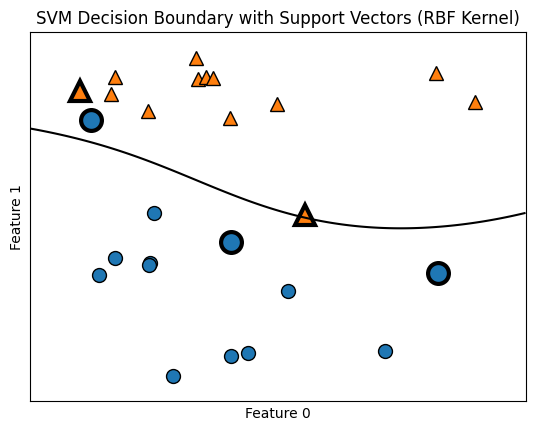

In [3]:
# Import necessary libraries
from sklearn.svm import SVC
import mglearn
import matplotlib.pyplot as plt

# Load a handcrafted 2D classification dataset from mglearn
X, y = mglearn.tools.make_handcrafted_dataset()

# Train an SVM classifier with RBF (Gaussian) kernel
# C controls the trade-off between margin size and misclassification
# gamma controls the influence of a single training example
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

# Plot the decision boundary and margins
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

# Plot the original data points (colored by class)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Get the support vectors (the points that lie on the boundary)
sv = svm.support_vectors_

# Find which support vectors belong to which class
sv_labels = svm.dual_coef_.ravel() > 0

# Plot the support vectors with larger size and edge width
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels,
                         s=15, markeredgewidth=3)

# Add axis labels
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("SVM Decision Boundary with Support Vectors (RBF Kernel)")
plt.show()


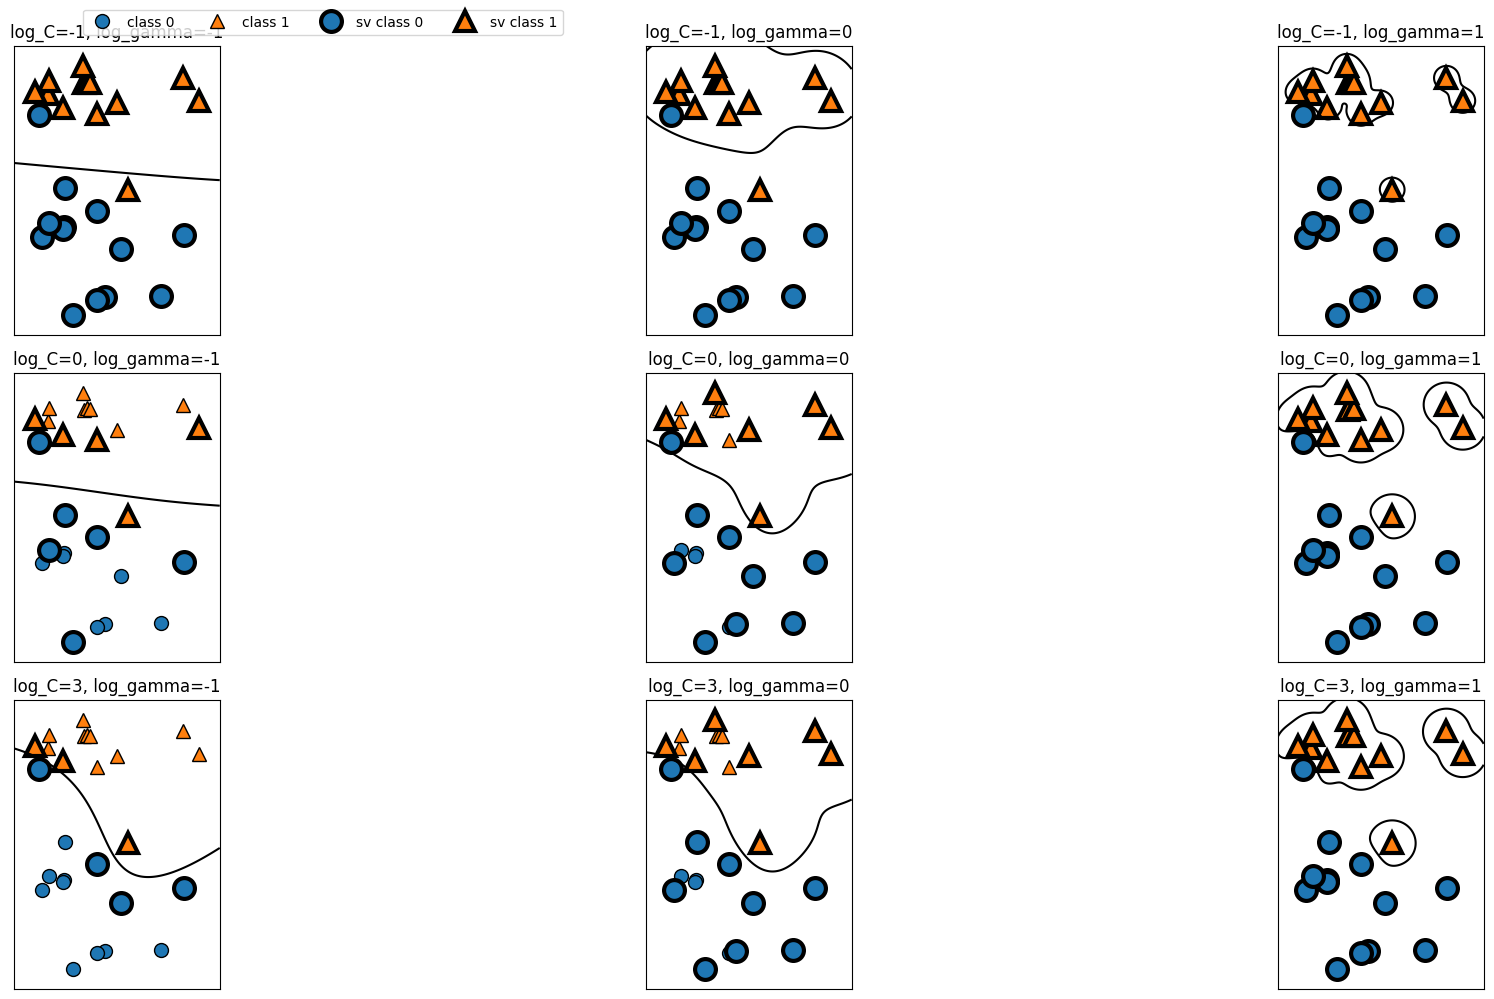

In [10]:
# Create a 3x3 grid of subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Loop over each row of axes and assign log-scaled C values
for row_axes, log_C in zip(axes, [-1, 0, 3]):
    # Within each row, loop over axes (columns) and assign log-scaled gamma values
    for ax, log_gamma in zip(row_axes, range(-1, 2)):
        # Plot the SVM decision boundary with the given log_C and log_gamma
        mglearn.plots.plot_svm(log_C=log_C, log_gamma=log_gamma, ax=ax)
        # Set a title for each subplot to indicate the current C and gamma values
        ax.set_title(f"log_C={log_C}, log_gamma={log_gamma}")

# Add a legend to the first subplot
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc="upper center", bbox_to_anchor=(1.5, 1.15))

# Adjust layout so labels/titles do not overlap
plt.tight_layout()
plt.show()
